In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/loan_approval_dataset.csv")
df_copy = df.copy()
df.head()

print(df.shape)
print(df.info())
print(df.isnull().sum())



(4269, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
None

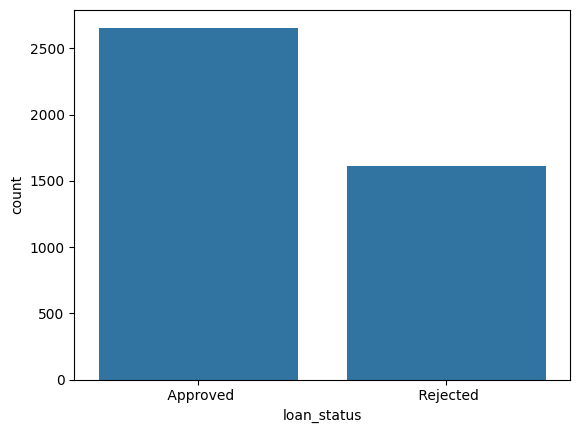

In [2]:

# Clean up column names
df.columns = df.columns.str.strip()
sns.countplot(x='loan_status', data=df)
plt.show()


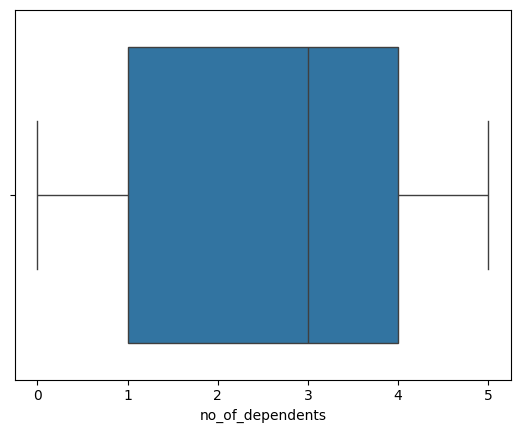

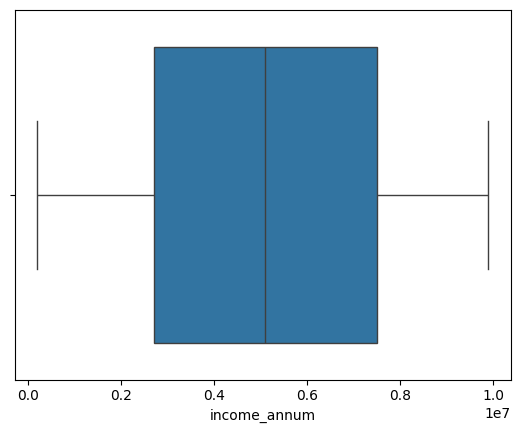

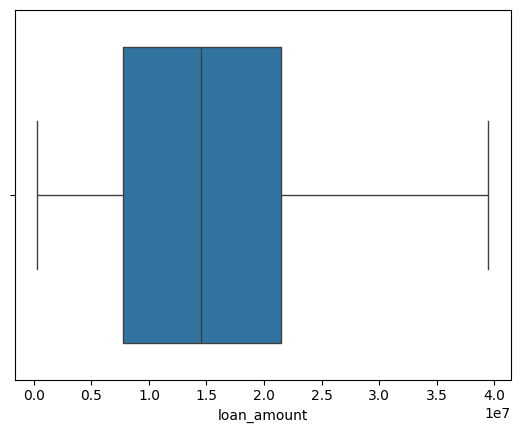

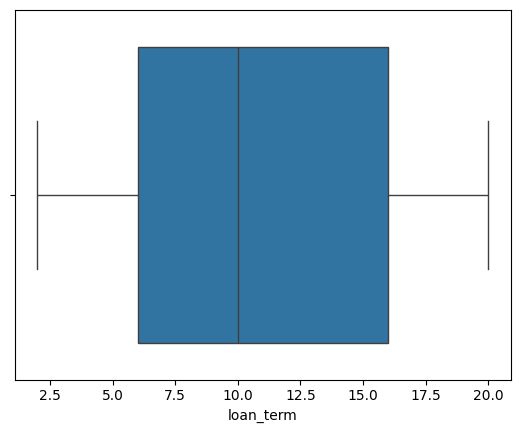

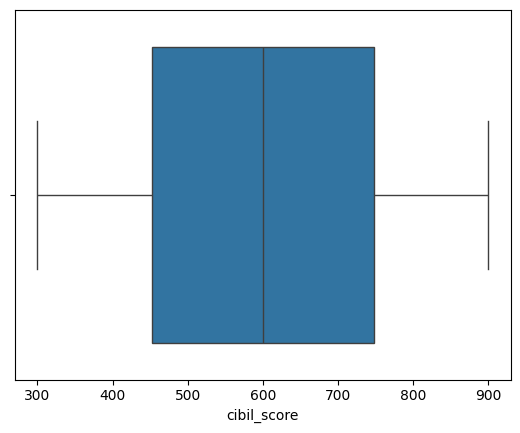

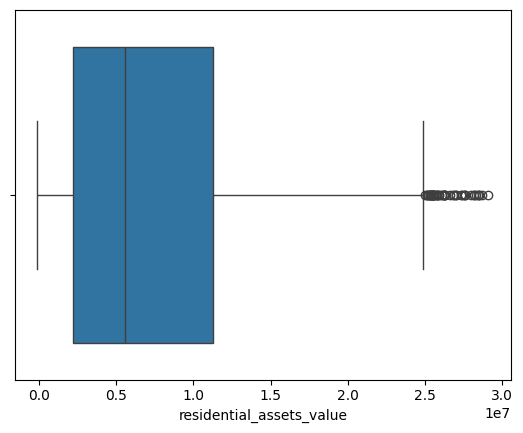

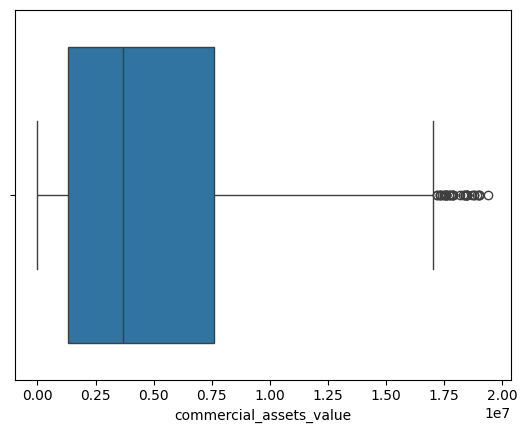

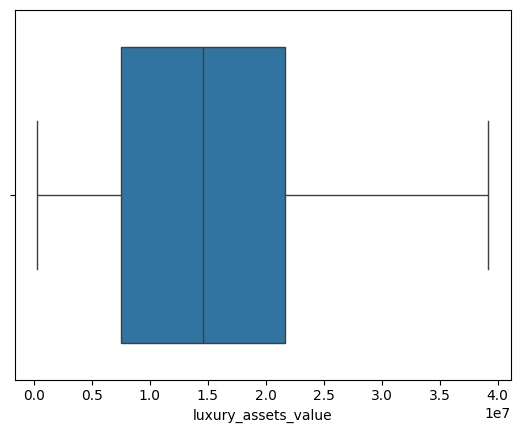

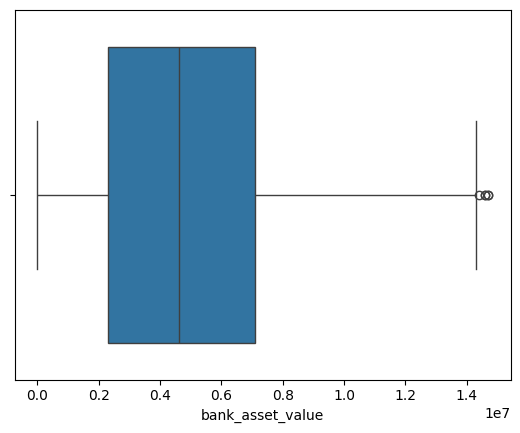

In [3]:
num_cols = ['no_of_dependents','income_annum','loan_amount','loan_term',
            'cibil_score','residential_assets_value','commercial_assets_value',
            'luxury_assets_value','bank_asset_value']

df[num_cols].describe().T

for col in num_cols:
    sns.boxplot(x=df[col])
    plt.show()


education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64


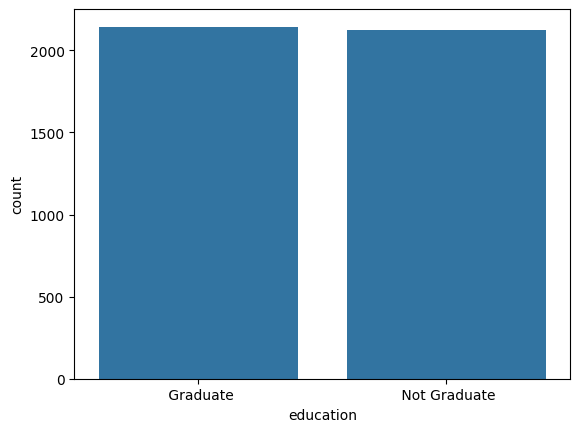

self_employed
Yes    2150
No     2119
Name: count, dtype: int64


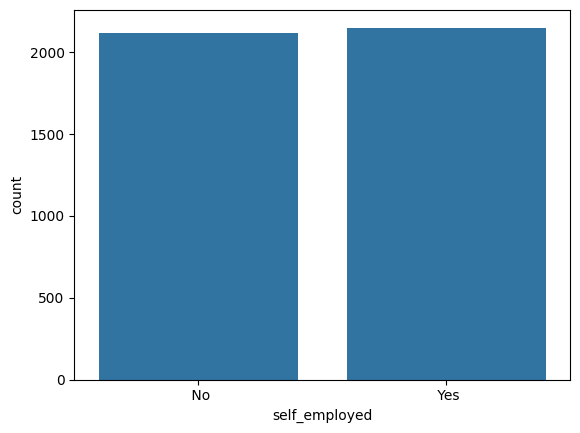

In [4]:
cat_cols = ['education','self_employed']
for col in cat_cols:
    print(df[col].value_counts())
    sns.countplot(x=col, data=df)
    plt.show()


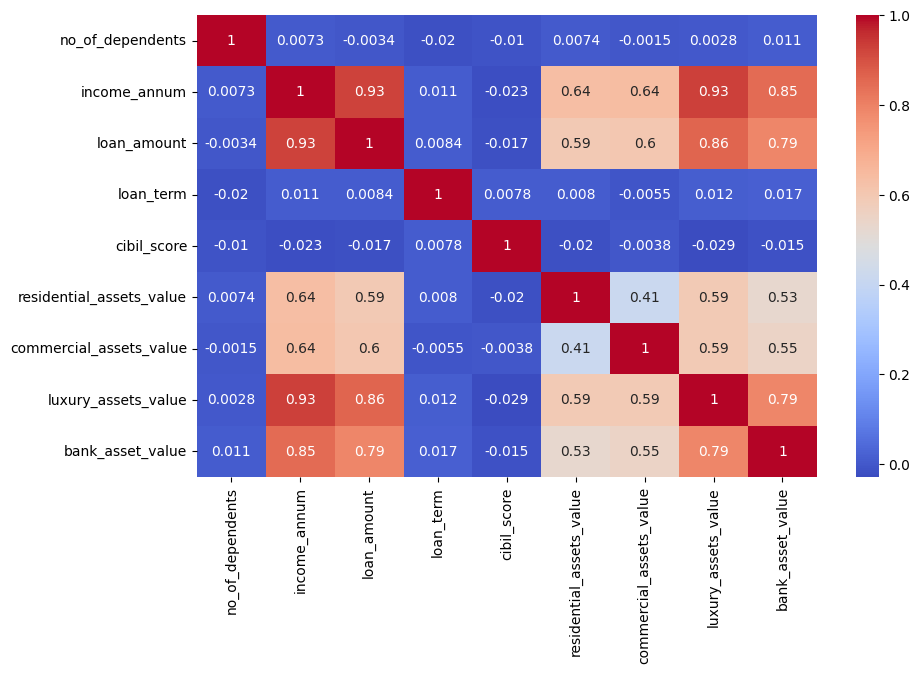

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.show()


# Preprocessing

In [6]:
print(df['loan_status'].unique())
# Clean up values first
df['loan_status'] = df['loan_status'].str.strip().str.lower()

# Map to 0/1
df['loan_status'] = df['loan_status'].map({'approved': 1, 'rejected': 0}).astype(int)
print(df['loan_status'].unique())



[' Approved' ' Rejected']
[1 0]


In [7]:
df = df.drop(columns=['loan_id'])
df = pd.get_dummies(df, columns=['education','self_employed'], drop_first=True).astype(int)



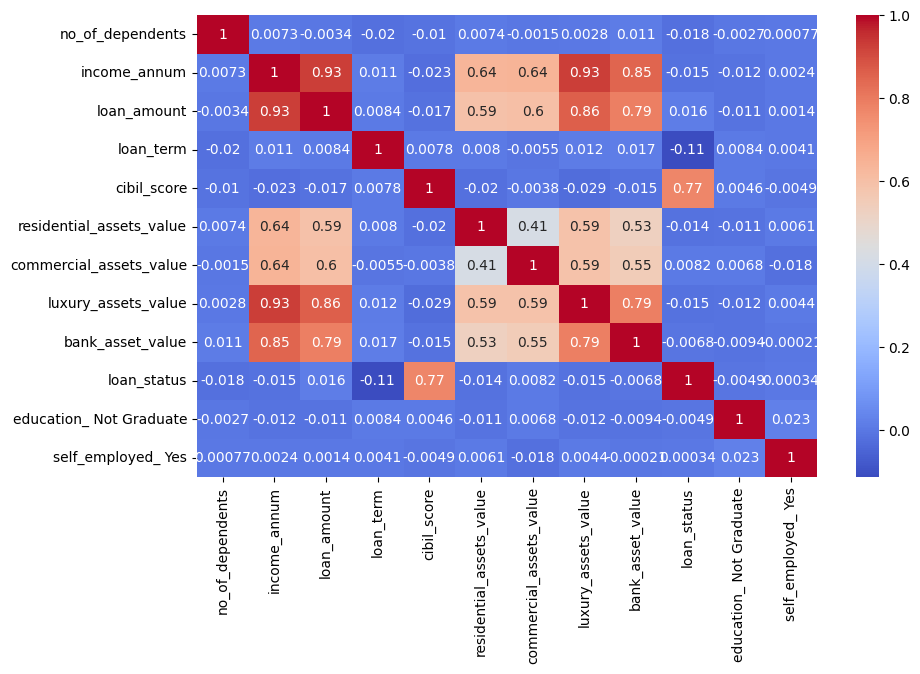

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [9]:
df

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_ Not Graduate,self_employed_ Yes
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,0,0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,1,1
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,0,0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,0,0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,2800000,500000,3300000,800000,0,0,1
4265,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1,1,1
4266,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0,1,0
4267,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,1,1,0


In [10]:
df.to_csv("../data/processed_loan_data.csv", index=False)